In [1]:
manifold = require 'manifold'

In [7]:
-- local manifold = require 'manifold'

-- function to show an MNIST 2D group scatter plot:
function show_scatter_plot(mapped_x, labels)

  -- count label sizes:
  local K = 10
  local cnts = torch.zeros(K)
  for n = 1,labels:nElement() do
    cnts[labels[n] + 1] = cnts[labels[n] + 1] + 1
  end

  -- separate mapped data per label:
  mapped_data = {}
  for k = 1,K do
    mapped_data[k] = { key = 'Digit ' .. k - 1, values = torch.Tensor(cnts[k], opts.ndims) }
  end
  local offset = torch.Tensor(K):fill(1)
  for n = 1,labels:nElement() do
    mapped_data[labels[n] + 1].values[offset[labels[n] + 1]]:copy(mapped_x[n])
    offset[labels[n] + 1] = offset[labels[n] + 1] + 1
  end

  -- show results in scatter plot:
--[[
  local gfx = require 'gfx.js'
  gfx.chart(mapped_data, {
     chart = 'scatter',
     width = 600,
     height = 600,
  })
--]]
--     plot = Plot():circle(x1, y1, 'red', 'hi'):circle(x2, y2, 'blue', 'bye'):draw()
end

-- show map with original digits:
function show_map(mapped_data, X)
  
  -- draw map with original digits:
  local im_size = 2048
  local background = 0
  local background_removal = true
  map_im = manifold.draw_image_map(mapped_data, X:resize(X:size(1), 1, 28, 28), im_size, background, background_removal)
  
  -- plot results:
--   local gfx = require 'gfx.js'
--   gfx.image(map_im)
end

--   show_scatter_plot(mapped_x2, labels)
--   show_map(mapped_x2, x:clone())


In [8]:
-- function that performs demo of t-SNE code on MNIST:
local function demo_tsne()

  -- amount of data to use for test:
  local N = 5000

  -- load subset of MNIST test data:
  local mnist = require 'mnist'
  local testset = mnist.testdataset()
  testset.size  = N
  testset.data  = testset.data:narrow(1, 1, N)
  testset.label = testset.label:narrow(1, 1, N)
  local x = torch.Tensor(testset.data:size())
  x:map(testset.data, function(xx, yy) return yy end)
  x:resize(x:size(1), x:size(2) * x:size(3))
  local labels = testset.label

  -- run t-SNE:
--    --[[    
  local timer = torch.Timer()
    --[[
  opts = {ndims = 2, perplexity = 30, pca = 50, use_bh = false}
  mapped_x1 = manifold.embedding.tsne(x, opts)
    --]]
  print('Successfully performed t-SNE in ' .. timer:time().real .. ' seconds.')
--   show_scatter_plot(mapped_x1, labels)
--   show_map(mapped_x1, x:clone())
    --]]
  -- run Barnes-Hut t-SNE:
  opts = {ndims = 2, perplexity = 30, pca = 50, use_bh = true, theta = 0.5}
  timer:reset()
  mapped_x2 = manifold.embedding.tsne(x, opts)
  print('Successfully performed Barnes Hut t-SNE in ' .. timer:time().real .. ' seconds.')
  show_scatter_plot(mapped_x2, labels)
  show_map(mapped_x2, x:clone())
end


-- run the demo:
demo_tsne()

Successfully performed t-SNE in 1.3113021850586e-05 seconds.	

Performing preprocessing using PCA...	


Read the 5000 x 50 data matrix successfully!
Using current time as random seed...
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 0 of 5000
Done in 3.98 seconds (sparsity = 0.024861)!
Learning embedding...
Iteration 50: error is 89.165932 (50 iterations in 3.15 seconds)
Iteration 100: error is 85.202675 (50 iterations in 4.07 seconds)
Iteration 150: error is 82.268894 (50 iterations in 2.51 seconds)
Iteration 200: error is 82.204961 (50 iterations in 2.27 seconds)
Iteration 250: error is 4.366101 (50 iterations in 2.31 seconds)
Iteration 300: error is 2.541696 (50 iterations in 2.19 seconds)
Iteration 350: error is 2.175013 (50 iterations in 2.27 seconds)
Iteration 400: error is 1.990789 (50 iterations in 2.27 seconds)
Iteration 450: error is 1.879317 (50 iterations in 2.30 seconds)
Iteration 500: error is 1.803648 (50 iterations in 2.33 seconds)
Iteration 550: error is 1.752397 (50 iterations in 2.40 seconds)
It

Successfully performed Barnes Hut t-SNE in 61.609532117844 seconds.	


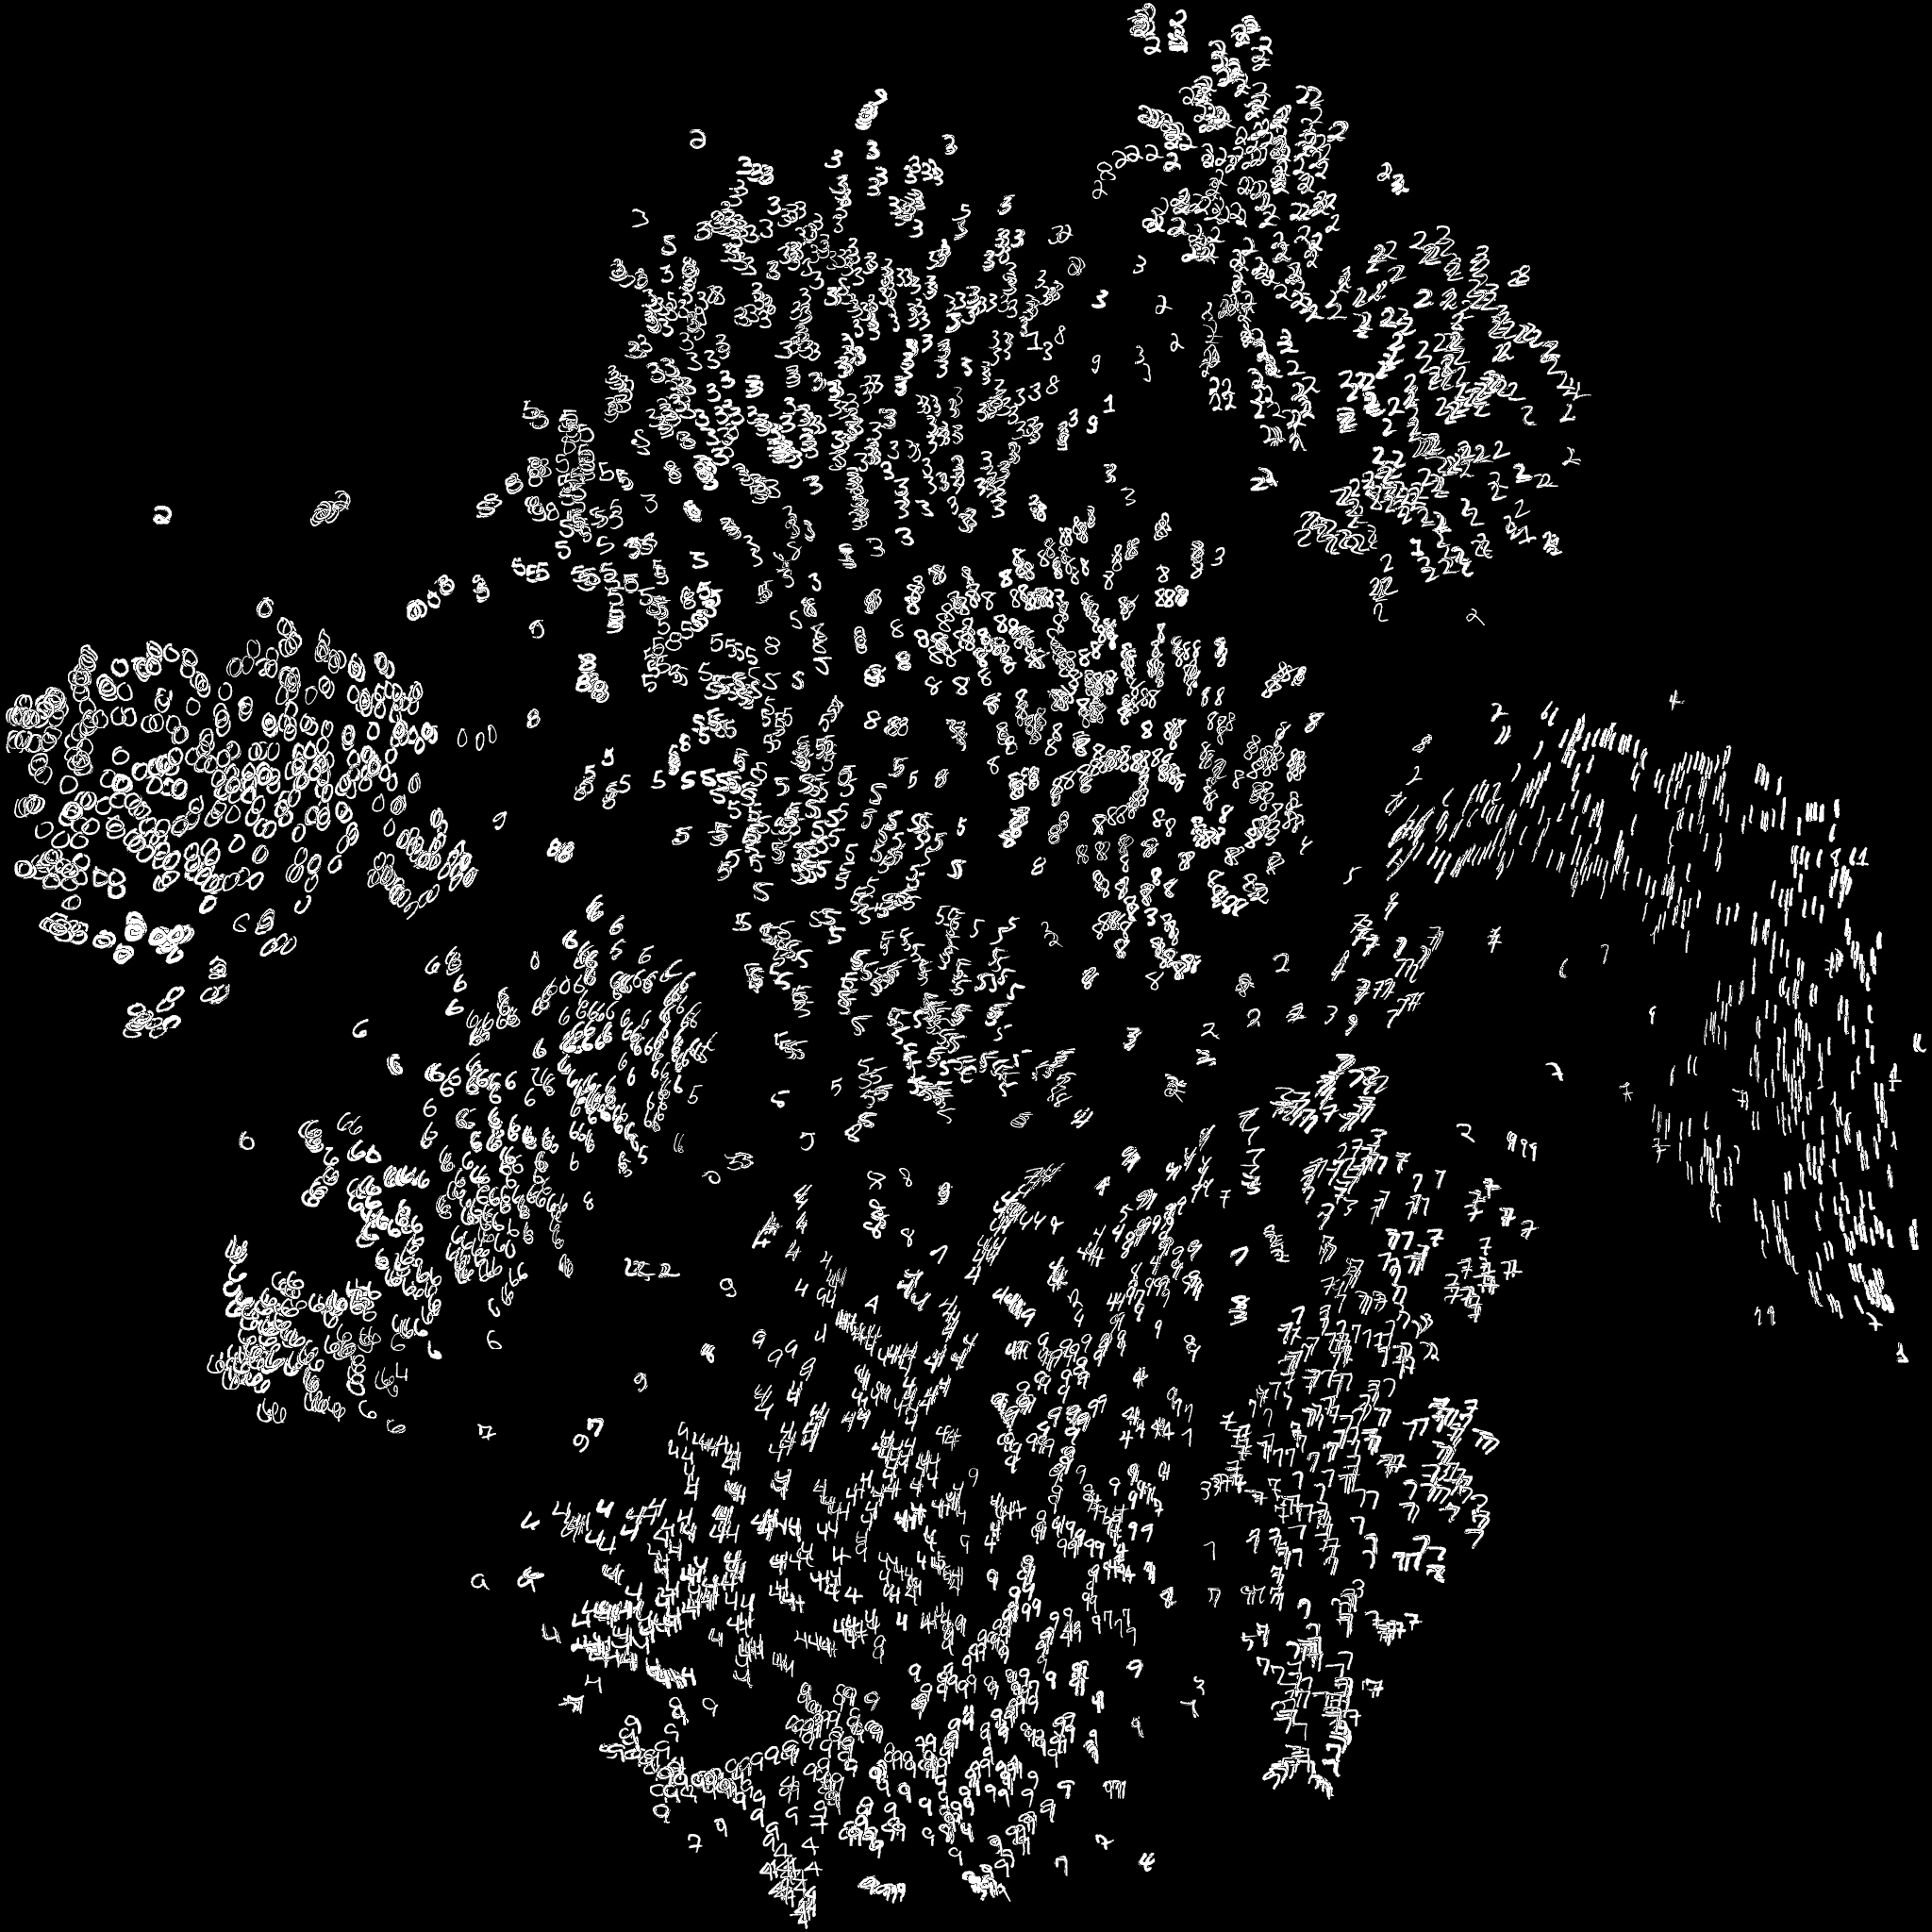

In [10]:
itorch.image(map_im)

The 17 standard colors are: aqua, black, blue, fuchsia, gray, green, lime, maroon, navy, olive, orange, purple, red, silver, teal, white, and yellow.

In [44]:
col = {'orange', 'black', 'blue', 'fuchsia', 'gray', 'green', 'teal', 'red', 'navy', 'yellow'}

In [55]:
plot = Plot()
for i,ver in ipairs(mapped_data) do 
    plot:circle(ver['values'][{{},1}],ver['values'][{{},2}],col[i], ver['key'])
end
plot:title('MNIST tSNE')
plot:legend(true)
plot:draw()